<a href="https://colab.research.google.com/github/Ademola409/Geospatial_data_science/blob/main/LifeExpectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount the drive**

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/MyDrive/DataScience' 

/content/drive/MyDrive/DataScience


**Importing the relevant libraries**

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Loading the raw data**

In [ ]:
raw_data=pd.read_csv('Life_Expectancy_Data.csv')
raw_data.head() #returns the first five rows of the dataset

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


**Preprocessing**

**Exploring the descriptive statistics of the variables**


In [ ]:
raw_data.describe(include='all') # gives information of all the variables columns in the dataset

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


**Dealing with missing values**

In [ ]:
raw_data.isnull().sum() #sums up the missing values for each column

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
data_no_mv= raw_data.dropna(axis=0) # Delete the missing values in the columns 


In [ ]:
data_no_mv.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


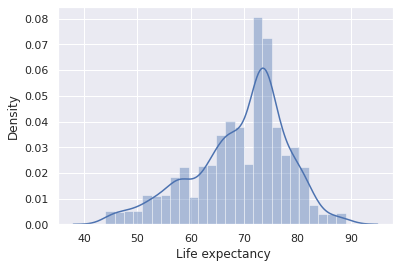

In [ ]:
sns.distplot(data_no_mv['Life expectancy '])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


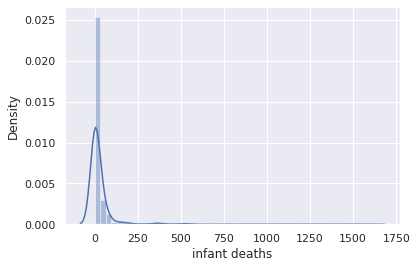

In [ ]:
sns.distplot(data_no_mv['infant deaths'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


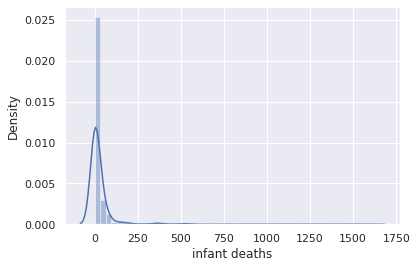

In [ ]:
sns.distplot(data_no_mv['infant deaths'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


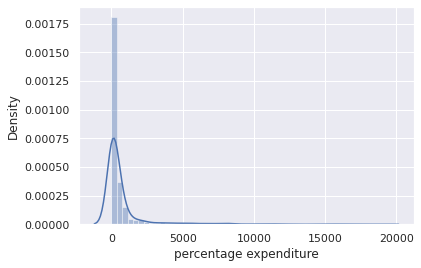

In [ ]:
sns.distplot(data_no_mv['percentage expenditure'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


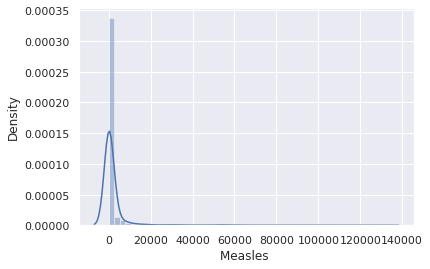

In [ ]:
sns.distplot(data_no_mv['Measles '])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


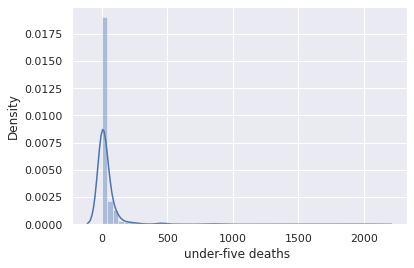

In [ ]:
sns.distplot(data_no_mv['under-five deaths '])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


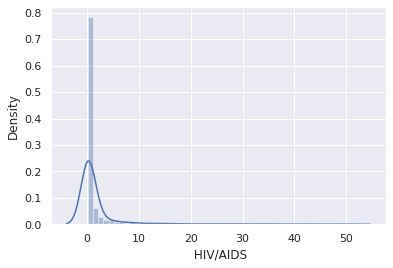

In [ ]:
sns.distplot(data_no_mv[' HIV/AIDS'])

In [ ]:
q=data_no_mv['infant deaths'].quantile(0.99)
data_1=data_no_mv[data_no_mv['infant deaths']<q]
data_1.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1.632000e+03,1632.000000,1632.000000,1632.000000,1632.000000
mean,2007.833946,69.385355,168.002451,22.360294,4.530735,705.745433,79.691789,1874.479167,38.356434,30.200368,83.780025,5.973928,84.418505,1.984130,5614.726179,1.058957e+07,4.674571,4.726961,0.632581,12.142279
std,4.098272,8.777943,125.040977,55.821847,4.034702,1767.110180,25.201967,9038.374191,19.724462,74.379738,22.389233,2.304336,21.397628,6.059073,11525.364438,2.754558e+07,4.223427,4.256691,0.183698,2.799816
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.475000,77.000000,1.000000,0.730000,38.012130,75.000000,0.000000,19.700000,1.000000,81.000000,4.450000,82.000000,0.100000,463.518942,1.867505e+05,1.600000,1.600000,0.510750,10.400000
50%,2008.000000,71.800000,148.000000,3.000000,3.800000,150.360282,91.000000,13.000000,44.050000,4.000000,93.000000,5.860000,93.000000,0.100000,1636.135505,1.361184e+06,3.000000,3.100000,0.675000,12.300000
75%,2011.000000,75.000000,227.000000,21.000000,7.330000,516.142505,96.000000,341.000000,55.825000,26.250000,97.000000,7.482500,97.000000,0.700000,4778.253990,7.357486e+06,6.900000,7.000000,0.752000,14.000000
max,2015.000000,89.000000,723.000000,513.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,802.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,2.551311e+08,21.600000,22.000000,0.936000,20.700000


In [ ]:

q=data_1['percentage expenditure'].quantile(0.99)
data_2=data_1[data_1['percentage expenditure']<q]

In [ ]:
q=data_2['Measles '].quantile(0.99)
data_3=data_2[data_2['Measles ']<q]

In [ ]:
q=data_3['under-five deaths '].quantile(0.99)
data_4=data_3[data_3['under-five deaths ']<q]

In [ ]:
q=data_4[' HIV/AIDS'].quantile(0.99)
data_5=data_4[data_4[' HIV/AIDS']<q]
data_5.describe() 

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1566.00000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1.566000e+03,1566.000000,1566.000000,1566.000000,1566.000000
mean,2007.85696,69.576501,166.165390,16.434866,4.505888,598.298052,80.086845,1047.124521,38.686526,22.528097,83.925287,5.989419,84.528736,1.593997,4991.077146,1.028823e+07,4.609642,4.659706,0.633059,12.186845
std,4.08034,8.464457,119.499115,30.332501,4.038826,1287.061550,25.036053,3602.674559,19.719015,41.342984,22.426796,2.297737,21.552436,4.489991,8866.151140,2.642121e+07,4.118172,4.141370,0.183810,2.749405
min,2000.00000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.00000,64.700000,79.000000,1.000000,0.712500,38.620751,75.000000,0.000000,19.700000,1.000000,82.000000,4.460000,82.000000,0.100000,462.241716,1.972838e+05,1.600000,1.625000,0.515750,10.500000
50%,2008.00000,71.800000,148.000000,3.000000,3.755000,151.830998,91.000000,11.000000,44.700000,4.000000,93.000000,5.885000,93.000000,0.100000,1633.115790,1.370540e+06,2.950000,3.100000,0.677000,12.400000
75%,2011.00000,75.000000,225.750000,20.000000,7.307500,515.188779,96.000000,283.500000,55.900000,23.750000,97.000000,7.522500,97.000000,0.700000,4770.503002,7.285914e+06,6.900000,6.975000,0.752000,14.000000
max,2015.00000,89.000000,723.000000,231.000000,17.870000,8547.292357,99.000000,42724.000000,77.100000,270.000000,99.000000,14.390000,99.000000,34.600000,52567.525680,2.551311e+08,19.900000,19.900000,0.925000,20.700000


In [ ]:
data_cleaned=data_5.reset_index(drop=True)

In [ ]:
data_cleaned.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1566.00000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1.566000e+03,1566.000000,1566.000000,1566.000000,1566.000000
mean,2007.85696,69.576501,166.165390,16.434866,4.505888,598.298052,80.086845,1047.124521,38.686526,22.528097,83.925287,5.989419,84.528736,1.593997,4991.077146,1.028823e+07,4.609642,4.659706,0.633059,12.186845
std,4.08034,8.464457,119.499115,30.332501,4.038826,1287.061550,25.036053,3602.674559,19.719015,41.342984,22.426796,2.297737,21.552436,4.489991,8866.151140,2.642121e+07,4.118172,4.141370,0.183810,2.749405
min,2000.00000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.00000,64.700000,79.000000,1.000000,0.712500,38.620751,75.000000,0.000000,19.700000,1.000000,82.000000,4.460000,82.000000,0.100000,462.241716,1.972838e+05,1.600000,1.625000,0.515750,10.500000
50%,2008.00000,71.800000,148.000000,3.000000,3.755000,151.830998,91.000000,11.000000,44.700000,4.000000,93.000000,5.885000,93.000000,0.100000,1633.115790,1.370540e+06,2.950000,3.100000,0.677000,12.400000
75%,2011.00000,75.000000,225.750000,20.000000,7.307500,515.188779,96.000000,283.500000,55.900000,23.750000,97.000000,7.522500,97.000000,0.700000,4770.503002,7.285914e+06,6.900000,6.975000,0.752000,14.000000
max,2015.00000,89.000000,723.000000,231.000000,17.870000,8547.292357,99.000000,42724.000000,77.100000,270.000000,99.000000,14.390000,99.000000,34.600000,52567.525680,2.551311e+08,19.900000,19.900000,0.925000,20.700000


In [ ]:
data_cleaned.columns.values

array(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'], dtype=object)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned[['Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values, i) for i in range (variables.shape[1])]
vif['features']=variables.columns



In [ ]:
print(vif)

           VIF                         features
0    85.854620                             Year
1     5.574593                  Adult Mortality
2   104.595424                    infant deaths
3     4.409174                          Alcohol
4     9.766403           percentage expenditure
5    18.330596                      Hepatitis B
6     1.487112                         Measles 
7     8.941474                             BMI 
8   106.482286               under-five deaths 
9    25.785551                            Polio
10    8.675498                Total expenditure
11   33.888500                      Diphtheria 
12    1.870512                         HIV/AIDS
13   11.199644                              GDP
14    1.483625                       Population
15   18.836690             thinness  1-19 years
16   18.722139               thinness 5-9 years
17   37.384016  Income composition of resources
18   78.496263                        Schooling


In [ ]:
data_no_multicollinearity=data_cleaned.drop([ 'Year', 'Status',
       'infant deaths', 'percentage expenditure',
       'Hepatitis B',' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', 'GDP',
        ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'], axis=1)

In [ ]:
data_no_multicollinearity.describe(include='all')

,Country,Life expectancy,Adult Mortality,Alcohol,Measles,HIV/AIDS,Population
count,1566,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1.566000e+03
unique,130,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,69.576501,166.165390,4.505888,1047.124521,1.593997,1.028823e+07
std,NaN,8.464457,119.499115,4.038826,3602.674559,4.489991,2.642121e+07
min,NaN,44.000000,1.000000,0.010000,0.000000,0.100000,3.400000e+01
25%,NaN,64.700000,79.000000,0.712500,0.000000,0.100000,1.972838e+05
50%,NaN,71.800000,148.000000,3.755000,11.000000,0.100000,1.370540e+06
75%,NaN,75.000000,225.750000,7.307500,283.500000,0.700000,7.285914e+06


In [ ]:
data_with_dummies=pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_with_dummies.describe(include='all')

,Life expectancy,Adult Mortality,Alcohol,Measles,HIV/AIDS,Population,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,...,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe
count,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1.566000e+03,1566.000000,1566.000000,1566.000000,1566.000000,...,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,69.576501,166.165390,4.505888,1047.124521,1.593997,1.028823e+07,0.010217,0.007024,0.005109,0.008301,...,0.009579,0.009579,0.008301,0.007663,0.009579,0.009579,0.008301,0.009579,0.006386,0.007024
std,8.464457,119.499115,4.038826,3602.674559,4.489991,2.642121e+07,0.100594,0.083543,0.071314,0.090762,...,0.097431,0.097431,0.090762,0.087229,0.097431,0.097431,0.090762,0.097431,0.079680,0.083543
min,44.000000,1.000000,0.010000,0.000000,0.100000,3.400000e+01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.700000,79.000000,0.712500,0.000000,0.100000,1.972838e+05,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,71.800000,148.000000,3.755000,11.000000,0.100000,1.370540e+06,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,225.750000,7.307500,283.500000,0.700000,7.285914e+06,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,89.000000,723.000000,17.870000,42724.000000,34.600000,2.551311e+08,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
targets=data_with_dummies['Life expectancy ']
inputs= data_with_dummies.drop(['Life expectancy '],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [ ]:
inputs_scaled=scaler.transform(inputs)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [ ]:
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_hat=reg.predict(x_train)

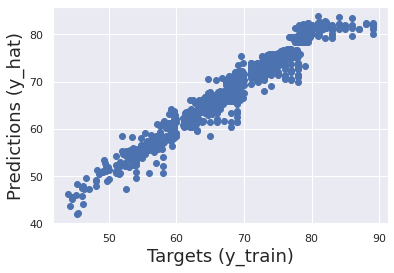

In [ ]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


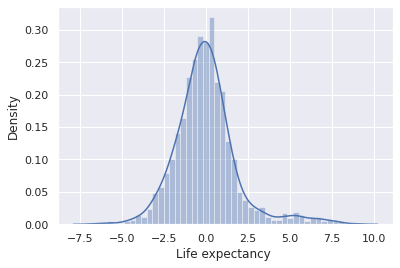

In [ ]:
sns.distplot(y_train - y_hat)

In [ ]:
reg.score(x_train, y_train)

0.950160059800031

In [ ]:
y_hat_test= reg.predict(x_test)

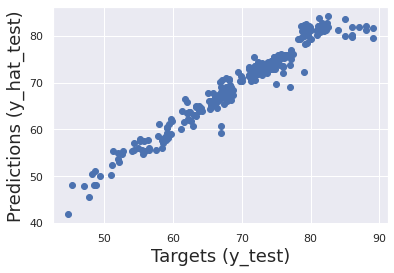

In [ ]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.show()

In [ ]:
df_pf= pd.DataFrame(y_hat_test, columns=['Prediction'])

df_pf.head()

,Prediction
0,80.078958
1,82.012018
2,61.673064
3,74.088696
4,80.196122


In [ ]:
df_pf['Target']=y_test
df_pf.head()

,Prediction,Target
0,80.078958,NaN
1,82.012018,NaN
2,61.673064,NaN
3,74.088696,NaN
4,80.196122,NaN


In [ ]:
print(y_test)

544     86.0
687     82.5
565     59.9
1252    73.8
551     79.6
        ... 
1263    72.2
776     72.8
1450    74.5
69      73.3
205     76.4
Name: Life expectancy , Length: 314, dtype: float64


In [ ]:
y_test=y_test.reset_index(drop=True)
y_test.head()

0    86.0
1    82.5
2    59.9
3    73.8
4    79.6
Name: Life expectancy , dtype: float64

In [ ]:
df_pf['Target']=y_test
df_pf.head()

,Prediction,Target
0,80.078958,86.0
1,82.012018,82.5
2,61.673064,59.9
3,74.088696,73.8
4,80.196122,79.6


In [ ]:
df_pf['Residual']= df_pf['Target']-df_pf['Prediction']

In [ ]:
df_pf['Difference%']=np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,80.078958,86.0,5.921042,6.884933
1,82.012018,82.5,0.487982,0.591494
2,61.673064,59.9,-1.773064,2.960039
3,74.088696,73.8,-0.288696,0.391188
4,80.196122,79.6,-0.596122,0.748897
...,...,...,...,...
309,71.947816,72.2,0.252184,0.349286
310,73.689672,72.8,-0.889672,1.222077
311,73.982511,74.5,0.517489,0.694616
312,73.460120,73.3,-0.160120,0.218445


In [ ]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,314.000000,314.000000,314.000000,314.000000
mean,70.476207,70.491720,0.015513,1.900068
std,8.437296,8.793906,1.977137,1.983397
min,41.804290,44.800000,-4.822161,0.011583
25%,66.028435,66.025000,-1.132909,0.578649
50%,72.902466,72.750000,-0.098158,1.223564
75%,75.484480,75.775000,0.764507,2.414236
max,84.160194,89.000000,9.381463,11.545167


In [ ]:
pd.options.display.max_rows=1000
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
20,73.091533,73.1,0.008467,0.011583
102,73.015214,73.0,-0.015214,0.020842
54,72.818605,72.8,-0.018605,0.025556
265,81.975036,82.0,0.024964,0.030444
70,71.624870,71.6,-0.024870,0.034735
63,72.226128,72.2,-0.026128,0.036188
169,62.173688,62.2,0.026312,0.042302
211,73.168970,73.2,0.031030,0.042391
165,62.969731,63.0,0.030269,0.048047
184,74.038438,74.0,-0.038438,0.051943


In [ ]:
df = pd.DataFrame({'id' : [1,1,1,2,2,3,4,5,5,5,5,7,8,9,9]
                   ,'grp' : ['a_1', 'a_2', 'b_1', 'b_2', 'c_1', 'z_1', 'y_1', 'a_1', 'a_2', 'a_1', 'a_2', 'z_1', 'q_1', 'a_2','a_1']
                   ,'values1' : [i for i in range(2,17,1)]
                   ,'values2' : [i for i in range(4,33,2)]
                  })

In [ ]:
df

,id,grp,values1,values2
0,1,a_1,2,4
1,1,a_2,3,6
2,1,b_1,4,8
3,2,b_2,5,10
4,2,c_1,6,12
5,3,z_1,7,14
6,4,y_1,8,16
7,5,a_1,9,18
8,5,a_2,10,20
9,5,a_1,11,22


In [ ]:
df['grp'].replace(to_replace={'a_1':'b_1', 'a_2':'b_2'}, inplace= True)


In [ ]:
x=df.copy()

In [ ]:
x

,id,grp,values1,values2
0,1,b_1,2,4
1,1,b_2,3,6
2,1,b_1,4,8
3,2,b_2,5,10
4,2,c_1,6,12
5,3,z_1,7,14
6,4,y_1,8,16
7,5,b_1,9,18
8,5,b_2,10,20
9,5,b_1,11,22
